# Pytorch

## One dimension example

99 4094.4697265625
199 2757.052490234375
299 1859.0650634765625
399 1255.6307373046875
499 849.7869873046875
599 576.594970703125
699 392.5303955078125
799 268.3998107910156
899 184.6075897216797
999 127.98914337158203
1099 89.69358825683594
1199 63.764381408691406
1299 46.18952560424805
1399 34.26457214355469
1499 26.164287567138672
1599 20.655977249145508
1699 16.906030654907227
1799 14.35018253326416
1899 12.60630989074707
1999 11.415016174316406
Result: y = -0.03971024230122566 + 0.8232017159461975 x + 0.006850678939372301 x^2 + -0.08855973929166794 x^3


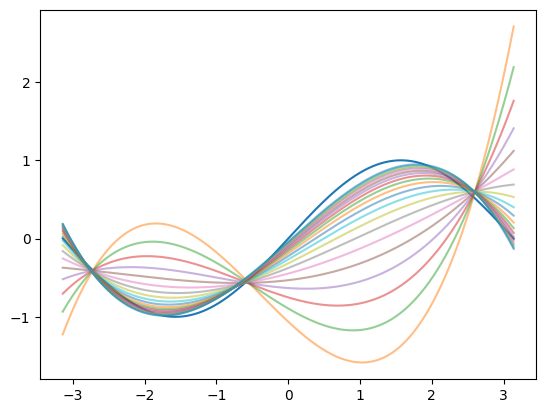

In [1]:
import matplotlib.pyplot as plt

import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
plt.plot(x, y)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)
        plt.plot(x, a + b * x + c * x ** 2 + d * x ** 3, alpha=0.5)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

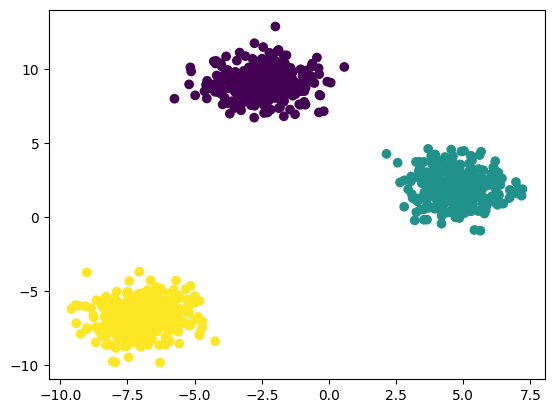

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, n_features=2, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)

In [3]:
from sklearn.model_selection import train_test_split

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 3)
        
    def forward(self, x):
        x = F.softmax(self.layer1(x), dim=1)
        return x

model     = Model(X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=2, out_features=3, bias=True)
)

In [5]:
import tqdm
import numpy as np

EPOCHS  = 100
X_train_tensor = Variable(torch.from_numpy(X_train)).float()
y_train_tensor = Variable(torch.from_numpy(y_train)).long()
X_test_tensor  = Variable(torch.from_numpy(X_test)).float()
y_test_tensor  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        correct = (torch.argmax(y_pred, dim=1) == y_test_tensor).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1105.24it/s]


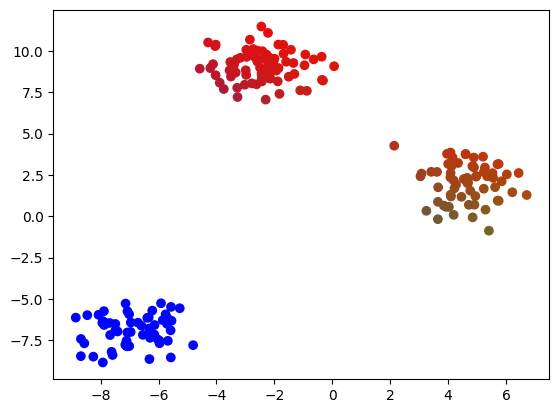

In [6]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

In [7]:
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping

model = NeuralNetClassifier(
    Model(input_dim=2),
    #criterion=torch.nn.BCEWithLogitsLoss,
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,
    lr=0.0001,
    max_epochs=100,
    batch_size=10,
    callbacks=[('estoper', EarlyStopping(monitor='valid_loss',
                                         patience = 10,
                                         threshold = 0.01,
                                         threshold_mode='rel',
                                         lower_is_better=True))]
)

model.fit(X_train_tensor, y_train)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.3507       0.2062        1.3542  0.0422
      2        1.3436       0.2250        1.3471  0.0419
      3        1.3365       0.2313        1.3401  0.0414
      4        1.3293       0.2375        1.3329  0.0411
      5        1.3221       0.2500        1.3258  0.0411
      6        1.3148       0.2750        1.3185  0.0413
      7        1.3073       0.2812        1.3110  0.0412
      8        1.2996       0.2875        1.3032  0.0412
      9        1.2916       0.2938        1.2950  0.0413
     10        1.2830       0.3000        1.2862  0.0411
     11        1.2736       0.3063        1.2765  0.0411
     12        1.2632       0.3125        1.2656  0.0410
     13        1.2514       0.3375        1.2532  0.0415
     14        1.2378       0.3375        1.2388  0.0413
     15        1.2220       0.3375        1.2221  0.0407
     16        1.2040       0.3

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Model(
    (layer1): Linear(in_features=2, out_features=3, bias=True)
  ),
)

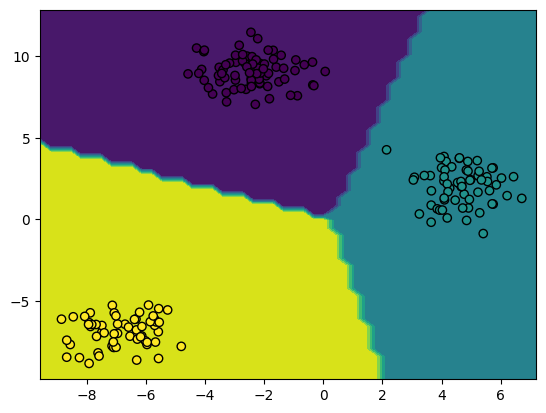

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay


feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max()),
    np.linspace(X[:, 1].min(), X[:, 1].max())
)

feature_1 = Variable(torch.from_numpy(feature_1)).float()
feature_2 = Variable(torch.from_numpy(feature_2)).float()
grid = Variable(torch.from_numpy(np.vstack([feature_1.ravel(), feature_2.ravel()]).T)).float()

y_pred = np.reshape(model.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
plt.axis("tight")

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k')